In [113]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [114]:
def getMatrix(n, p):
    claster = np.full((n, n), 0);

    for j in range(n):
        for i in range(n):
            alpha = np.random.random();
            if alpha <= p:
                claster[i,j] = 1;
    return claster;

def findFreeParent(children, labels):
    while True:
        parent = int(labels[children]);
        if parent == 0:
            return children;

        children = parent;

def hkAlgorithm(matrix, n):
    largestLabel = 1;
    labels = np.zeros(n*n);

    for y in range(n):
        for x in range(n):

            if matrix[y, x] == 0:
                continue;

            left = int(matrix[y, x - 1] if x != 0 else 0);
            above = int(matrix[y - 1, x] if y != 0 else 0);

            if left == 0 and above == 0:
                largestLabel = largestLabel + 1;
                matrix[y, x] = largestLabel;
            elif left == above:
                matrix[y, x] = left;
            elif left != 0 and above == 0:
                matrix[y, x] = left;
            elif left == 0 and above != 0:
                matrix[y, x] = above;
            else:
                leftParent = findFreeParent(left, labels);
                aboveParent = findFreeParent(above, labels);
                if leftParent == aboveParent:
                    matrix[y, x] = leftParent;
                else:
                    smallLabel = leftParent if leftParent < aboveParent else aboveParent;
                    bigLabel = leftParent if leftParent > aboveParent else aboveParent;
                    matrix[y, x] = smallLabel;
                    labels[bigLabel] = smallLabel;
     
    for y in range(n):
        for x in range(n):
            label = int(matrix[y, x]);
            if label == 0 or labels[label] == 0:
                continue;

            label = findFreeParent(label, labels);
            matrix[y, x] = label;
                

    return matrix;

# Пробой считаем, если есть пересечение сверху вниз (и наоборот)
def findBreakdown(matrix, n):    
    upLabels = matrix[0];
    downLabels = matrix[-1];
    upLabels = np.unique(upLabels[upLabels > 0]);
    downLabels = np.unique(downLabels[downLabels > 0]);


    tMatrix = matrix.transpose();
    leftLabels = tMatrix[0];
    rightLabels = tMatrix[-1];
    leftLabels = np.unique(leftLabels[leftLabels > 0]);
    rightLabels = np.unique(rightLabels[rightLabels > 0]);

    return np.intersect1d(upLabels, downLabels).size > 0 or np.intersect1d(leftLabels, rightLabels).size > 0;

def findBreakdown1(matrix, n):    
    upLabels = matrix[0];
    downLabels = matrix[-1];
    upLabels = np.unique(upLabels[upLabels > 0]);
    downLabels = np.unique(downLabels[downLabels > 0]);


    tMatrix = matrix.transpose();
    leftLabels = tMatrix[0];
    rightLabels = tMatrix[-1];
    leftLabels = np.unique(leftLabels[leftLabels > 0]);
    rightLabels = np.unique(rightLabels[rightLabels > 0]);

    array1 = np.intersect1d(upLabels, downLabels);
    array2 = np.intersect1d(leftLabels, rightLabels);
    return np.concatenate((array1, array2));

In [115]:
count = 100;
sizes = [4, 8, 16, 32];
meanPArray = [];
devArray = [];
pInf = [];


def main():
    global count, sizes, meanPArray, devArray, pInf;

    meanPArray = [];
    devArray = [];
    pInf = [];

    for j, n in enumerate(sizes):
        pArray = [];
        pTempInf = [];
        for i in range(count):
            p = 0.01;
            m = getMatrix(n, p);    
            labelM = hkAlgorithm(m.copy(), n);
            while findBreakdown(labelM, n) == False:
                m = getMatrix(n, p);    
                labelM = hkAlgorithm(m.copy(), n);
                p += 0.005;
            pArray.append(p);
            
            connectingLabels = findBreakdown1(labelM, n);
            sizeConnectingClaster = 0;
            for num in connectingLabels:
                sizeConnectingClaster += labelM[labelM == num].shape[0];
                        
            pTempInf.append(sizeConnectingClaster / labelM[labelM > 0].shape[0]);
        
        pTempInf = np.array(pTempInf);
        pArray = np.array(pArray);
        meanP = pArray.sum() / count;

        dev = math.sqrt(((pArray - meanP)**2).sum() / (count));
        meanPArray.append(meanP);
        devArray.append(dev);
        pInf.append(pTempInf.mean());
    
    meanPArray = np.array(meanPArray); 
    devArray = np.array(devArray);
    pInf = np.array(pInf);
    return;

main();

In [119]:
print(pInf)

[0.9117096  0.75756887 0.61075142 0.56667564]


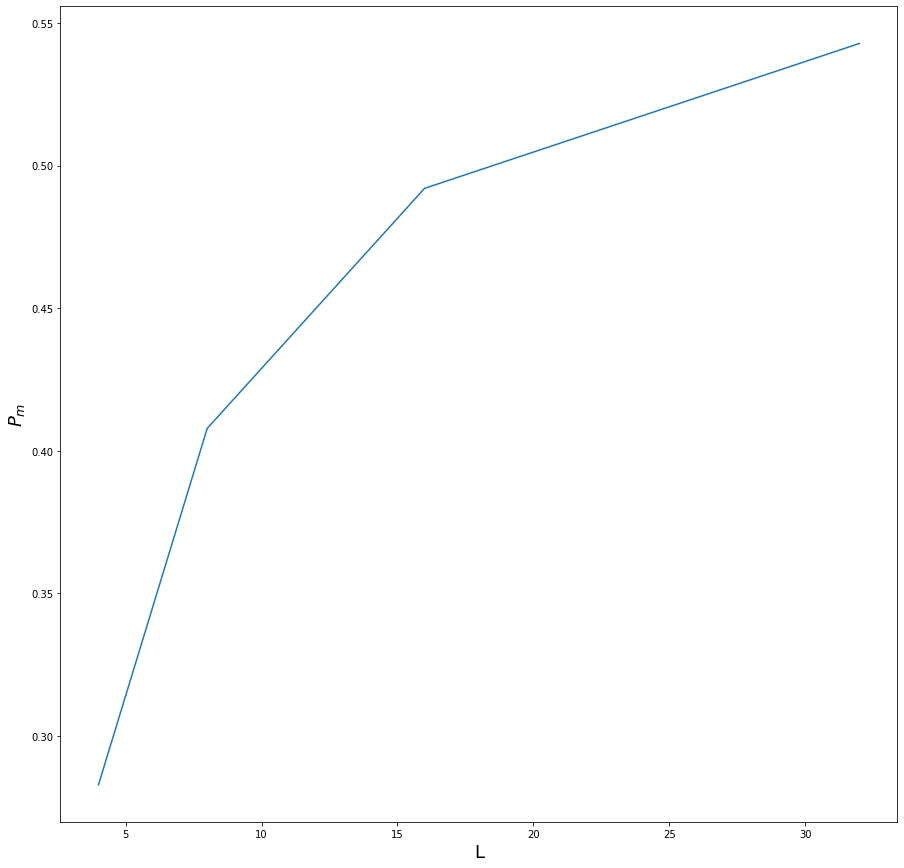

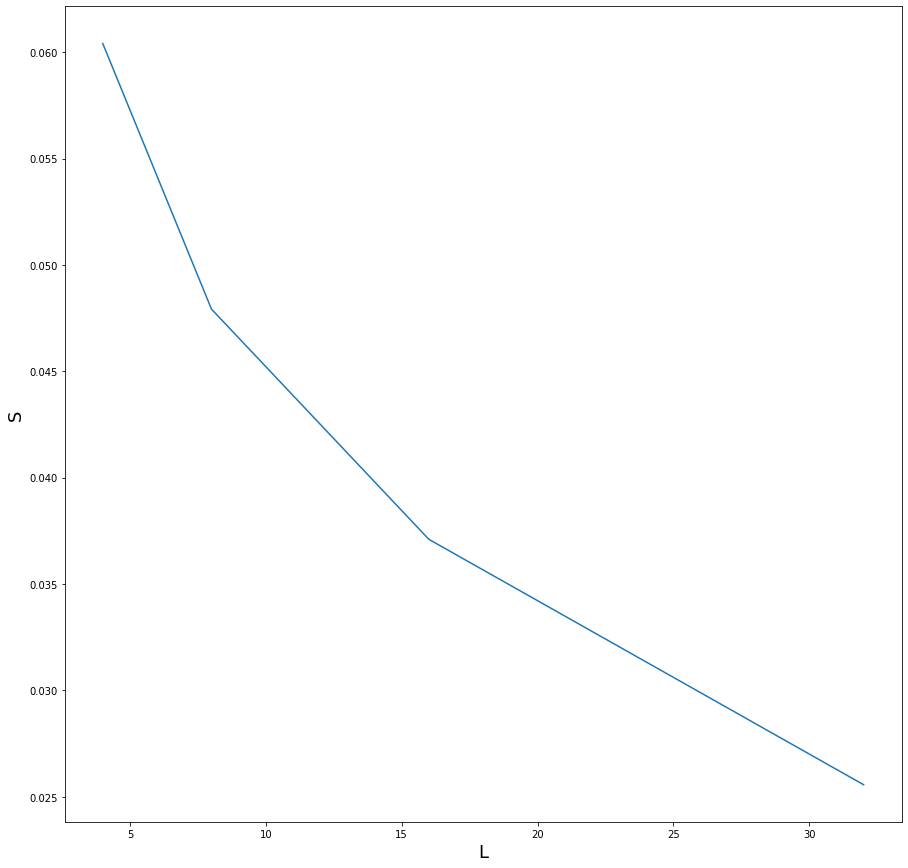

In [117]:
fig, ax = plt.subplots(figsize=(15,15));
fig.set_figwidth(15);
fig.set_figheight(15);
ax.set_xlabel("L", fontsize=18);    
ax.set_ylabel("$P_m$", fontsize=18);
ax.plot(sizes, meanPArray);
plt.savefig("GenFiles/7/2.png");

fig, ax = plt.subplots(figsize=(15,15));
fig.set_figwidth(15);
fig.set_figheight(15);
ax.set_xlabel("L", fontsize=18);    
ax.set_ylabel("S", fontsize=18);
ax.plot(sizes, devArray);
plt.savefig("GenFiles/7/3.png");




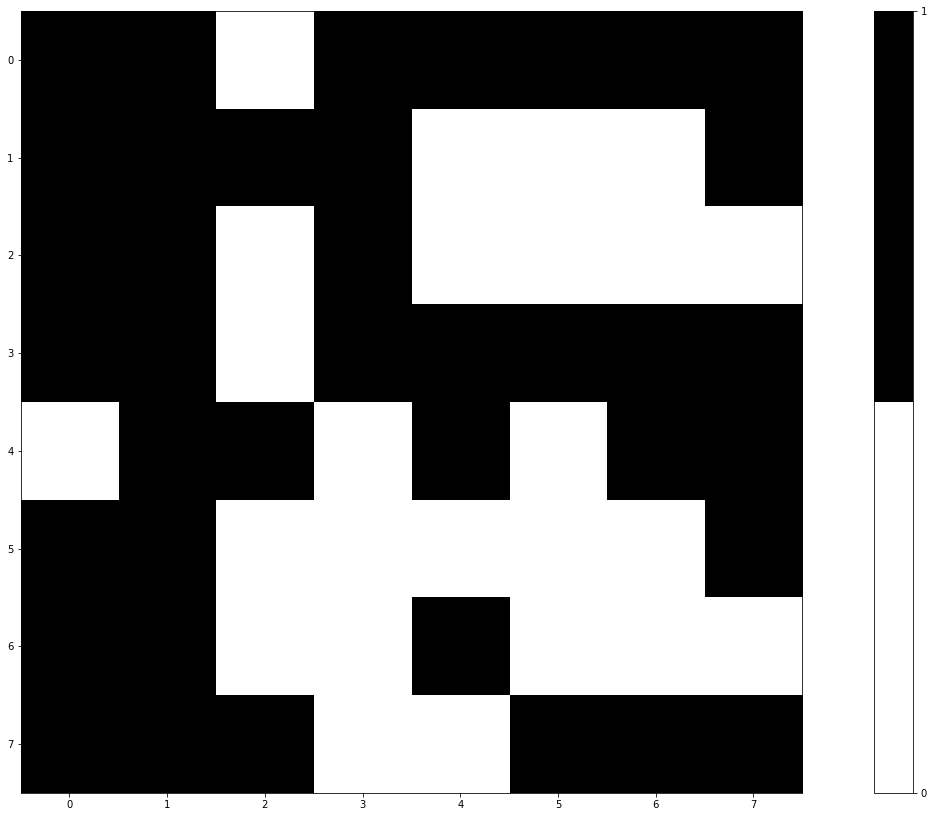

In [118]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors

n = 8;
p = 0.55;
model = getMatrix(n, p);
imageData = np.zeros((n, n));
for i in range(n):
    for j in range(n):
        imageData[i, j] = model[i, j];

plt.figure(figsize=(16,16));
cmap = colors.ListedColormap(['white', 'black']);
bounds=[0, 0.5, 1];
norm = colors.BoundaryNorm(bounds, cmap.N);
img = plt.imshow(imageData, cmap=cmap, norm=norm);
divider = make_axes_locatable(plt.gca());
cax = divider.append_axes("right", size="5%", pad=1);
plt.colorbar(img, boundaries=bounds, ticks=[-1, 0, 1], cax=cax);

plt.savefig("GenFiles/7/1.png");